# Import Modules

In [ ]:
# Common Imports
import keras
import numpy as np

# Data Imports
import pandas as pd

# Data Visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# Data Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Model
from keras import layers
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Model Evaluations
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df = pd.read_csv('/content/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# statistical info
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [ ]:
# datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocessing Data

In [ ]:
df = df.drop(columns = 'Id')

In [ ]:
# checking null values
# Record feature names with extremely high null values
high_null_count_features = []

# Record total number of features with null values
null_feature_values = 0

for feature, null_count in df.isnull().sum().items():
    if null_count > 0:
        print(f"{feature:20} : {null_count:4}")
        null_feature_values += 1

    if null_count >= 1000:
        high_null_count_features.append(feature)

print(f"\nFeatures with Null Values: {null_feature_values}")
print(f"Features with High Null Values: {len(high_null_count_features)}")

LotFrontage          :  259
Alley                : 1369
MasVnrType           :    8
MasVnrArea           :    8
BsmtQual             :   37
BsmtCond             :   37
BsmtExposure         :   38
BsmtFinType1         :   37
BsmtFinType2         :   38
Electrical           :    1
FireplaceQu          :  690
GarageType           :   81
GarageYrBlt          :   81
GarageFinish         :   81
GarageQual           :   81
GarageCond           :   81
PoolQC               : 1453
Fence                : 1179
MiscFeature          : 1406

Features with Null Values: 19
Features with High Null Values: 4


In [ ]:
# checking null values
# Record feature names with extremely high null values
high_null_count_features = []

# Record total number of features with null values
null_feature_values = 0

total_records = len(df)
threshold_percentage = 70  # Set your desired threshold percentage

for feature, null_count in df.isnull().sum().items():
    percentage_null = (null_count / total_records) * 100  # Define percentage_null here
    if null_count > 0:
        print(f"{feature:20} : {null_count:4} ({percentage_null:.2f}%)")
        null_feature_values += 1

    if percentage_null > threshold_percentage:
        high_null_count_features.append(feature)

print(f"\nFeatures with Null Values: {null_feature_values}")
print(f"Features with Null Values > {threshold_percentage}%: {len(high_null_count_features)}")

LotFrontage          :  259 (17.74%)
Alley                : 1369 (93.77%)
MasVnrType           :    8 (0.55%)
MasVnrArea           :    8 (0.55%)
BsmtQual             :   37 (2.53%)
BsmtCond             :   37 (2.53%)
BsmtExposure         :   38 (2.60%)
BsmtFinType1         :   37 (2.53%)
BsmtFinType2         :   38 (2.60%)
Electrical           :    1 (0.07%)
FireplaceQu          :  690 (47.26%)
GarageType           :   81 (5.55%)
GarageYrBlt          :   81 (5.55%)
GarageFinish         :   81 (5.55%)
GarageQual           :   81 (5.55%)
GarageCond           :   81 (5.55%)
PoolQC               : 1453 (99.52%)
Fence                : 1179 (80.75%)
MiscFeature          : 1406 (96.30%)

Features with Null Values: 19
Features with Null Values > 70%: 4


In [ ]:
# Reanalysis of null values with data types
null_features = []
for feature, null_count in df.isnull().sum().items():
    if null_count > 0:
        print(f"{feature:20} -> {str(df[feature].dtype):10} -> {null_count:5}")
        null_feature_values += 1
        null_features.append(feature)

    if null_count >= 1000:
        high_null_count_features.append(feature)

LotFrontage          -> float64    ->   259
Alley                -> object     ->  1369
MasVnrType           -> object     ->     8
MasVnrArea           -> float64    ->     8
BsmtQual             -> object     ->    37
BsmtCond             -> object     ->    37
BsmtExposure         -> object     ->    38
BsmtFinType1         -> object     ->    37
BsmtFinType2         -> object     ->    38
Electrical           -> object     ->     1
FireplaceQu          -> object     ->   690
GarageType           -> object     ->    81
GarageYrBlt          -> float64    ->    81
GarageFinish         -> object     ->    81
GarageQual           -> object     ->    81
GarageCond           -> object     ->    81
PoolQC               -> object     ->  1453
Fence                -> object     ->  1179
MiscFeature          -> object     ->  1406


In [ ]:
# Fill the missing values
from sklearn.impute import SimpleImputer
for feature in null_features:

    if str(df[feature].dtype) == "object":

        # Impute using Mode Values
        imputer = SimpleImputer(strategy = "most_frequent")
        df[feature] = imputer.fit_transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

    else:
        # Impute using mean values
        imputer = SimpleImputer(strategy = "mean")
        df[feature] = imputer.fit_transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

In [ ]:
print(f"Null Values Left: {any(df.isnull().sum())}")

Null Values Left: False


In [ ]:
# Record the feature and its respective encoder
encoders = {}

# Use ordinary encoder to convert category into numeric values
for feature in df.columns:
    if str(df[feature].dtype) == "object":

        # Initialize the ordinal encoder
        encoder = OrdinalEncoder()

        # Apply the ordinal encoder
        encoder.fit(df[feature].to_numpy().reshape(-1, 1))
        df[feature] = encoder.transform(df[feature].to_numpy().reshape(-1, 1)).ravel()

        # Save the encoder
        encoders[feature] = encoder

In [ ]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Exploratory Data Analysis

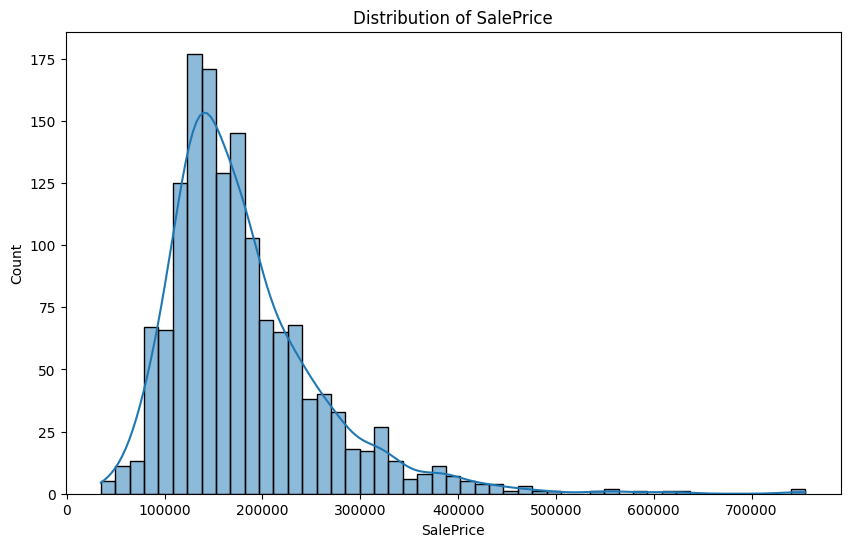

In [ ]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.show()

In [ ]:
# Compute Spearman correlation
import plotly.express as px
corr = df.corr(method = "spearman")
corr = corr[np.round(corr, 2) > .7]

# Visualize Spearman correlation
fig = px.imshow(corr, text_auto = True, height = 800, color_continuous_scale='gray')
fig.show()

In [ ]:
fig = px.histogram(df, 'SalePrice', color="OverallQual", title="OverallQual vs SalePrice (0.8)")
fig.show()

fig = px.box(df, y = 'SalePrice', x = 'OverallQual', color="OverallQual", title="OverallQual vs SalePrice (0.8)")
fig.show()

In [ ]:
fig = px.histogram(df, x='YearBuilt', y='GarageYrBlt', title="YearBuilt vs GarageYrBlt (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'YearBuilt', y = 'GarageYrBlt', title="YearBuilt vs GarageYrBlt (0.8)")
fig.show()

In [ ]:
fig = px.histogram(df, x='Exterior1st', title="Histogram of Exterior1st", text_auto=True)
fig.show()

fig = px.histogram(df, x='Exterior2nd', title="Histogram of Exterior2nd", text_auto=True)
fig.show()

In [ ]:
fig = px.histogram(df, x = 'TotalBsmtSF', y = '1stFlrSF', title="TotalBsmtSF vs 1stFlrSF (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'TotalBsmtSF', y = '1stFlrSF', title="TotalBsmtSF vs 1stFlrSF (0.8)")
fig.show()

In [ ]:
fig = px.histogram(df, 'GrLivArea', color="TotRmsAbvGrd", title="TotRmsAbvGrd vs GrLivArea (0.8)")
fig.show()

fig = px.box(df, y = 'GrLivArea', x = 'TotRmsAbvGrd', color="TotRmsAbvGrd", title="TotRmsAbvGrd vs GrLivArea (0.8)")
fig.show()

In [ ]:
fig = px.histogram(df, x='SalePrice', y='GarageYrBlt', title="SalePrice vs GarageYrBlt (0.8)", text_auto=True)
fig.show()

fig = px.scatter(df, x = 'SalePrice', y = 'GarageYrBlt', title="SalePrice vs GarageYrBlt (0.8)")
fig.show()

In [ ]:
fig = px.histogram(df, 'GarageArea', color="GarageCars", title="GarageArea vs GarageCars (0.8)")
fig.show()

fig = px.box(df, y = 'GarageArea', x = 'GarageCars', color="GarageCars", title="GarageArea vs GarageCars (0.8)")
fig.show()

# Modeling

In [ ]:
y = df.pop('SalePrice')
x = df

In [ ]:
# applying standard scalar
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [ ]:
# Splitting data into training and testing set
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y,
    shuffle = True,
    random_state = 42,
    test_size = 0.25
)

In [ ]:
def metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    r2_s = r2_score(true, pred)
    return mse, mae, r2_s

In [ ]:
# Record all the training and validation scores
model_names = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize lists to store metrics
model_names = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

# Linear Regression
model_name = "LinearRegression"

# Initialize and train the Model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Calculate metrics
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Ridge Regression
model_name = "Ridge"
ridge = Ridge(alpha=0.1)
ridge.fit(x_train_scaled, y_train)

train_pred = ridge.predict(x_train_scaled)
test_pred = ridge.predict(x_test_scaled)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Lasso Regression
model_name = "Lasso"
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)

train_pred = lasso.predict(x_train_scaled)
test_pred = lasso.predict(x_test_scaled)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

lr_poly = Ridge(alpha=0.1)  # Ridge regularization for polynomial regression
lr_poly.fit(x_train_poly, y_train)

train_pred = lr_poly.predict(x_train_poly)
test_pred = lr_poly.predict(x_test_poly)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

model_name = "Polynomial Regression"
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Feature Selection
selector = SelectFromModel(lr)
selector.fit(x_train_scaled, y_train)

x_train_selected = selector.transform(x_train_scaled)
x_test_selected = selector.transform(x_test_scaled)

lr_selected = LinearRegression()
lr_selected.fit(x_train_selected, y_train)

train_pred = lr_selected.predict(x_train_selected)
test_pred = lr_selected.predict(x_test_selected)
train_mse = mean_squared_error(y_train, train_pred)
test_mse = mean_squared_error(y_test, test_pred)
train_mae = mean_absolute_error(y_train, train_pred)
test_mae = mean_absolute_error(y_test, test_pred)
train_r2 = r2_score(y_train, train_pred)
test_r2 = r2_score(y_test, test_pred)

model_name = "Linear Regression with Feature Selection"
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Linear Regression with Cross-Validation
cv_scores = cross_val_score(lr, x_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse_mean = np.mean(-cv_scores)

model_name = "Linear Regression with Cross-Validation"
model_names.append(model_name)
train_mses.append(cv_mse_mean)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

print("\nModel Name :", model_name)
print("Train MSE (Cross-Validation):", cv_mse_mean)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Print the final results
print("\nFinal Results:")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"Train MSE: {train_mses[i]}")
    print(f"Test MSE: {test_mses[i]}")
    print(f"Train MAE: {train_maes[i]}")
    print(f"Test MAE: {test_maes[i]}")
    print(f"Train R2: {train_r2s[i]}")
    print(f"Test R2: {test_r2s[i]}")
    print("-" * 30)


Model Name : LinearRegression
Train MSE  : 862701446.0641017
Test MSE   : 1163863921.0822222
Train MAE  : 18505.891677984935
Test MAE   : 21628.969426776177
Train R2   : 0.8579083846595261
Test R2    : 0.8338597323277883

Model Name : Ridge
Train MSE  : 862872732.052915
Test MSE   : 1162631168.6452365
Train MAE  : 18506.202047512757
Test MAE   : 21622.14432490575
Train R2   : 0.8578801729265486
Test R2    : 0.8340357063537414

Model Name : Lasso
Train MSE  : 862872699.2155628
Test MSE   : 1162725159.350395
Train MAE  : 18506.42172196279
Test MAE   : 21623.074679223475
Train R2   : 0.8578801783350389
Test R2    : 0.8340222892861351

Model Name : Polynomial Regression
Train MSE  : 1123.9749983789634
Test MSE   : 3403458916.28727
Train MAE  : 17.159046742198647
Test MAE   : 33963.826597728315
Train R2   : 0.9999998148752111
Test R2    : 0.5141600619103686

Model Name : Linear Regression with Feature Selection
Train MSE  : 2483343979.419665
Test MSE   : 2033091188.3890445
Train MAE  : 3119

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
import numpy as np


# Define a function to evaluate models
def evaluate_model(model, x_train, x_test, y_train, y_test, model_name):
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_mse = mean_squared_error(y_train, train_pred)
    test_mse = mean_squared_error(y_test, test_pred)
    train_mae = mean_absolute_error(y_train, train_pred)
    test_mae = mean_absolute_error(y_test, test_pred)
    train_r2 = r2_score(y_train, train_pred)
    test_r2 = r2_score(y_test, test_pred)

    model_names.append(model_name)
    train_mses.append(train_mse)
    test_mses.append(test_mse)
    train_maes.append(train_mae)
    test_maes.append(test_mae)
    train_r2s.append(train_r2)
    test_r2s.append(test_r2)

    print("\nModel Name :", model_name)
    print("Train MSE  :", train_mse)
    print("Test MSE   :", test_mse)
    print("Train MAE  :", train_mae)
    print("Test MAE   :", test_mae)
    print("Train R2   :", train_r2)
    print("Test R2    :", test_r2)

# Initialize lists to store metrics
model_names = []
train_mses = []
test_mses = []
train_maes = []
test_maes = []
train_r2s = []
test_r2s = []

# Linear Regression
model_name = "Linear Regression"
lr = LinearRegression()
lr.fit(x_train, y_train)
evaluate_model(lr, x_train, x_test, y_train, y_test, model_name)

# Ridge Regression
model_name = "Ridge"
ridge = Ridge(alpha=1.0)
ridge.fit(x_train_scaled, y_train)  # Add this line to fit the model
evaluate_model(ridge, x_train_scaled, x_test_scaled, y_train, y_test, model_name)

# Lasso Regression
model_name = "Lasso"
lasso = Lasso(alpha=0.1)
lasso.fit(x_train_scaled, y_train)
evaluate_model(lasso, x_train_scaled, x_test_scaled, y_train, y_test, model_name)

# Lasso Regression with Grid Search
model_name = "Lasso with Grid Search"
lasso = Lasso()
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
}

grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train_scaled, y_train)

best_lasso = grid_search.best_estimator_
evaluate_model(best_lasso, x_train_scaled, x_test_scaled, y_train, y_test, model_name)

print("\nBest Hyperparameters for Lasso:", grid_search.best_params_)

# Polynomial Features
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.transform(x_test_scaled)

lr_poly = Ridge(alpha=0.1)  # Ridge regularization for polynomial regression
lr_poly.fit(x_train_poly, y_train)
evaluate_model(lr_poly, x_train_poly, x_test_poly, y_train, y_test, "Polynomial Regression")

# Support Vector Regression (SVR)
model_name = "SupportVectorRegression"
svr = SVR()
param_grid = {
    'C': [0.2, 2, 20],
    'epsilon': [0.01, 0.1, 0.2],
    'kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

best_svr = grid_search.best_estimator_
evaluate_model(best_svr, x_train, x_test, y_train, y_test, model_name)

print("\nBest Hyperparameters for SVR:", grid_search.best_params_)

# Print the final results
print("\nFinal Results:")
for i in range(len(model_names)):
    print(f"\nModel: {model_names[i]}")
    print(f"Train MSE: {train_mses[i]}")
    print(f"Test MSE: {test_mses[i]}")
    print(f"Train MAE: {train_maes[i]}")
    print(f"Test MAE: {test_maes[i]}")
    print(f"Train R2: {train_r2s[i]}")
    print(f"Test R2: {test_r2s[i]}")
    print("-" * 30)


Model Name : Linear Regression
Train MSE  : 862701446.0641017
Test MSE   : 1163863921.0822222
Train MAE  : 18505.891677984935
Test MAE   : 21628.969426776177
Train R2   : 0.8579083846595261
Test R2    : 0.8338597323277883

Model Name : Ridge
Train MSE  : 862876118.1648995
Test MSE   : 1161600415.6745923
Train MAE  : 18502.853683670324
Test MAE   : 21610.62103023701
Train R2   : 0.8578796152155076
Test R2    : 0.8341828451827271

Model Name : Lasso
Train MSE  : 862872699.2155628
Test MSE   : 1162725159.350395
Train MAE  : 18506.42172196279
Test MAE   : 21623.074679223475
Train R2   : 0.8578801783350389
Test R2    : 0.8340222892861351

Model Name : Lasso with Grid Search
Train MSE  : 862889067.1935253
Test MSE   : 1160921774.0098407
Train MAE  : 18493.73479146292
Test MAE   : 21593.61228287596
Train R2   : 0.8578774824401391
Test R2    : 0.8342797205182306

Best Hyperparameters for Lasso: {'alpha': 10}

Model Name : Polynomial Regression
Train MSE  : 1123.9749983789634
Test MSE   : 3403

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# DecisionTreeRegression with Hyperparameter Tuning
model_name = "DecisionTreeRegression with Grid Search"

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best Decision Tree Regressor from the grid search
best_dtr = grid_search.best_estimator_

# Calculate metrics
train_pred = best_dtr.predict(x_train)
test_pred = best_dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

# Print the best hyperparameters
print("\nBest Hyperparameters for DecisionTreeRegressor:", grid_search.best_params_)

Model Name : DecisionTreeRegression with Grid Search
Train MSE  : 234674744.4254914
Test MSE   : 1448437027.2082489
Train MAE  : 9332.704428498948
Test MAE   : 25592.920880626225
Train R2   : 0.9613477945734737
Test R2    : 0.7932372410144326

Best Hyperparameters for DecisionTreeRegressor: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# DecisionTreeRegression with Max Depth = 5
model_name = "DecisionTreeRegression(MD=5)"

# Initialize and train the Model
dtr = DecisionTreeRegressor(max_depth=5)
dtr.fit(x_train, y_train)

# Calculate metrics
train_pred = dtr.predict(x_train)
test_pred = dtr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the appended results
print("Model Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Model Name : DecisionTreeRegression(MD=5)
Train MSE  : 798735260.7817721
Test MSE   : 1591091037.410442
Train MAE  : 20821.40418858876
Test MAE   : 27462.596958850085
Train R2   : 0.8684439629124678
Test R2    : 0.7728735412638047


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegression with Hyperparameter Tuning
model_name = "RandomForestRegression with Grid Search"

# Initialize and train the Model
rfr = RandomForestRegressor()

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_rfr = grid_search.best_estimator_

# Calculate metrics
train_pred = best_rfr.predict(x_train)
test_pred = best_rfr.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the best hyperparameters and the appended results
print("\nBest Hyperparameters for RandomForestRegressor:", grid_search.best_params_)
print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)


Best Hyperparameters for RandomForestRegressor: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}

Model Name : RandomForestRegression with Grid Search
Train MSE  : 276915844.1582951
Test MSE   : 772186954.116039
Train MAE  : 9352.614517722503
Test MAE   : 16995.131373560347
Train R2   : 0.9543904559458691
Test R2    : 0.8897711794944752


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# XGBRegressor with Hyperparameter Tuning
model_name = "XGBRegressor with Grid Search"

# Initialize and train the Model
xgb = XGBRegressor()

# Define the parameter grid to search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 1, 5],
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(x_train, y_train)

# Get the best model
best_xgb = grid_search.best_estimator_

# Calculate metrics
train_pred = best_xgb.predict(x_train)
test_pred = best_xgb.predict(x_test)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Append the metrics to the lists
model_names.append(model_name)
train_mses.append(train_mse)
test_mses.append(test_mse)
train_maes.append(train_mae)
test_maes.append(test_mae)
train_r2s.append(train_r2)
test_r2s.append(test_r2)

# Print the best hyperparameters and the appended results
print("\nBest Hyperparameters for XGBRegressor:", grid_search.best_params_)
print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)


Best Hyperparameters for XGBRegressor: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}

Model Name : XGBRegressor with Grid Search
Train MSE  : 52598338.45906826
Test MSE   : 552003238.1662992
Train MAE  : 5497.286436929224
Test MAE   : 16207.015485873288
Train R2   : 0.9913367678818998
Test R2    : 0.9212021576718352


In [ ]:
# Model evaluation
model_evals = pd.DataFrame(data={
    "Models": model_names,
    "Train MSE": train_mses,
    "Test MSE": test_mses,
    "Train MAE": train_maes,
    "Test MAE": test_maes,
    "Train R2": train_r2s,
    "Test R2": test_r2s
})

In [ ]:
# Train MSE Bar Graph
train_mse_bar = px.bar(model_evals, x = "Models", y = "Train MSE", title = "Train MSE Bar Graph", color="Models")
train_mse_bar.update_layout(showlegend=False)
train_mse_bar.show()

# Test MSE Bar Graph
test_mse_bar = px.bar(model_evals, x = "Models", y = "Test MSE", title = "Test MSE Bar Graph", color="Models")
test_mse_bar.update_layout(showlegend=False)
test_mse_bar.show()

In [ ]:
# Train MAE Bar Graph
train_mae_bar = px.bar(model_evals, x = "Models", y = "Train MAE", title = "Train MSE Bar Graph", color="Models")
train_mae_bar.update_layout(showlegend=False)
train_mae_bar.show()

# Test MAE Bar Graph
test_mae_bar = px.bar(model_evals, x = "Models", y = "Test MAE", title = "Test MSE Bar Graph", color="Models")
test_mae_bar.update_layout(showlegend=False)
test_mae_bar.show()

In [ ]:
# Train R2 Bar Graph
train_r2_bar = px.bar(model_evals, x="Models", y="Train R2", title="Train R2 Bar Graph", color="Models")
train_r2_bar.update_layout(showlegend=False)
train_r2_bar.show()

# Test R2 Bar Graph
test_r2_bar = px.bar(model_evals, x="Models", y="Test R2", title="Test R2 Bar Graph", color="Models")
test_r2_bar.update_layout(showlegend=False)
test_r2_bar.show()

# Implementing Neural Network

In [ ]:
# Initialize the neural network
model_name = "NeuralNetwork"
net = keras.Sequential([
#     layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

In [ ]:
# Compile the model
net.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate = 1e-3)
)

# Train the Neural Network
net.fit(
    x_train, y_train,
    epochs = 20,
#     verbose = 0
)

# Calculate metrices
train_pred = net.predict(x_train, verbose = 0)
test_pred = net.predict(x_test, verbose = 0)
train_mse, train_mae, train_r2 = metrics(y_train, train_pred)
test_mse, test_mae, test_r2 = metrics(y_test, test_pred)

# Print the appended results
print("\nModel Name :", model_name)
print("Train MSE  :", train_mse)
print("Test MSE   :", test_mse)
print("Train MAE  :", train_mae)
print("Test MAE   :", test_mae)
print("Train R2   :", train_r2)
print("Test R2    :", test_r2)

Epoch 1/20
35/35 [==============================] - 1s 3ms/step - loss: 39085105152.0000
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 38839533568.0000
Epoch 3/20
35/35 [==============================] - 0s 3ms/step - loss: 35760488448.0000
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 20339562496.0000
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 7390916096.0000
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 5047389696.0000
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 3737792768.0000
Epoch 8/20
35/35 [==============================] - 0s 3ms/step - loss: 3002495744.0000
Epoch 9/20
35/35 [==============================] - 0s 2ms/step - loss: 2540646656.0000
Epoch 10/20
35/35 [==============================] - 0s 3ms/step - loss: 2208846080.0000
Epoch 11/20
35/35 [==============================] - 0s 2ms/step - loss: 1960539648.0000
Epoch 12/20
35/35 [=======